In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
%%capture
#!pip install git+https://github.com/omarcastano/MasterThesis.git

In [ ]:
#!cp -r '/content/drive/MyDrive/Maestria/Datasets/Elevations.7z' /content
#!7z x "/content/Elevations.7z"
#!cp -r '/content/drive/MyDrive/Maestria/Datasets/Dataset.7z' /content
#!7z x "/content/Dataset.7z"

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split


from MasterThesis.ssl.elevation.dataset import CustomDataset
from MasterThesis.ssl.elevation.utils import visualize_augmented_images
from MasterThesis.trainer import Trainer

# import wandB
import wandb

wandb.login(key="3dfb06e1099f6465f340f29f3fbd268fac8216e2")

/home/omar/.pyenv/versions/3.9.0/envs/remote-sensing/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

In [2]:
drive_path = '/content/drive/MyDrive' 
drive_path = "/media/omar/storage/gdrive"

In [3]:
# Load metadata
path_to_metadata = f"{drive_path}/Maestria/Datasets/metadata.csv"
metadata = pd.read_csv(path_to_metadata).sample(frac=0.01, random_state=42)
print(metadata.shape)
metadata.head()

(597, 10)


,Id,Elevation,Image,Mask,non_agricultural(km2),agricultural_frontier(km2),legal_exclusions(km2),non_agricultural,legal_exclusions,agricultural_frontier
27030,181810200900132113,"18NVN/18NVN_1_0/(200, 900)/elevation.tif","18NVN/18NVN_1_0/(200, 900)/chip.npy","18NVN/18NVN_1_0/(200, 900)/mask.tif",0.062,0.938,0.0,1,0,1
23748,181851400700132112,"18NVM/18NVM_5_1/(400, 700)/elevation.tif","18NVM/18NVM_5_1/(400, 700)/chip.npy","18NVM/18NVM_5_1/(400, 700)/mask.tif",0.504,0.496,0.0,1,0,1
11740,181828300900132015,"18NUP/18NUP_2_8/(300, 900)/elevation.tif","18NUP/18NUP_2_8/(300, 900)/chip.npy","18NUP/18NUP_2_8/(300, 900)/mask.tif",0.000,1.000,0.0,0,0,1
44886,181852800500132215,"18NWP/18NWP_5_2/(800, 500)/elevation.tif","18NWP/18NWP_5_2/(800, 500)/chip.npy","18NWP/18NWP_5_2/(800, 500)/mask.tif",0.000,0.000,1.0,0,1,0
4543,181894400300132012,"18NUM/18NUM_9_4/(400, 300)/elevation.tif","18NUM/18NUM_9_4/(400, 300)/chip.npy","18NUM/18NUM_9_4/(400, 300)/mask.tif",0.034,0.966,0.0,1,0,1


In [4]:
# path to image and masks
path_to_images = f"{drive_path}/Maestria/Datasets/Dataset/"
path_to_elevations = f"{drive_path}/Maestria/Datasets/Elevations/"

In [5]:
from osgeo import gdal
import numpy as np

In [6]:
from PIL import Image

In [7]:
elevation = Image.open("/media/omar/storage/gdrive/Maestria/Datasets/Elevations/18NTN/18NTN_8_5/(0, 0)/elevation.tif")
elevation = np.array(elevation)

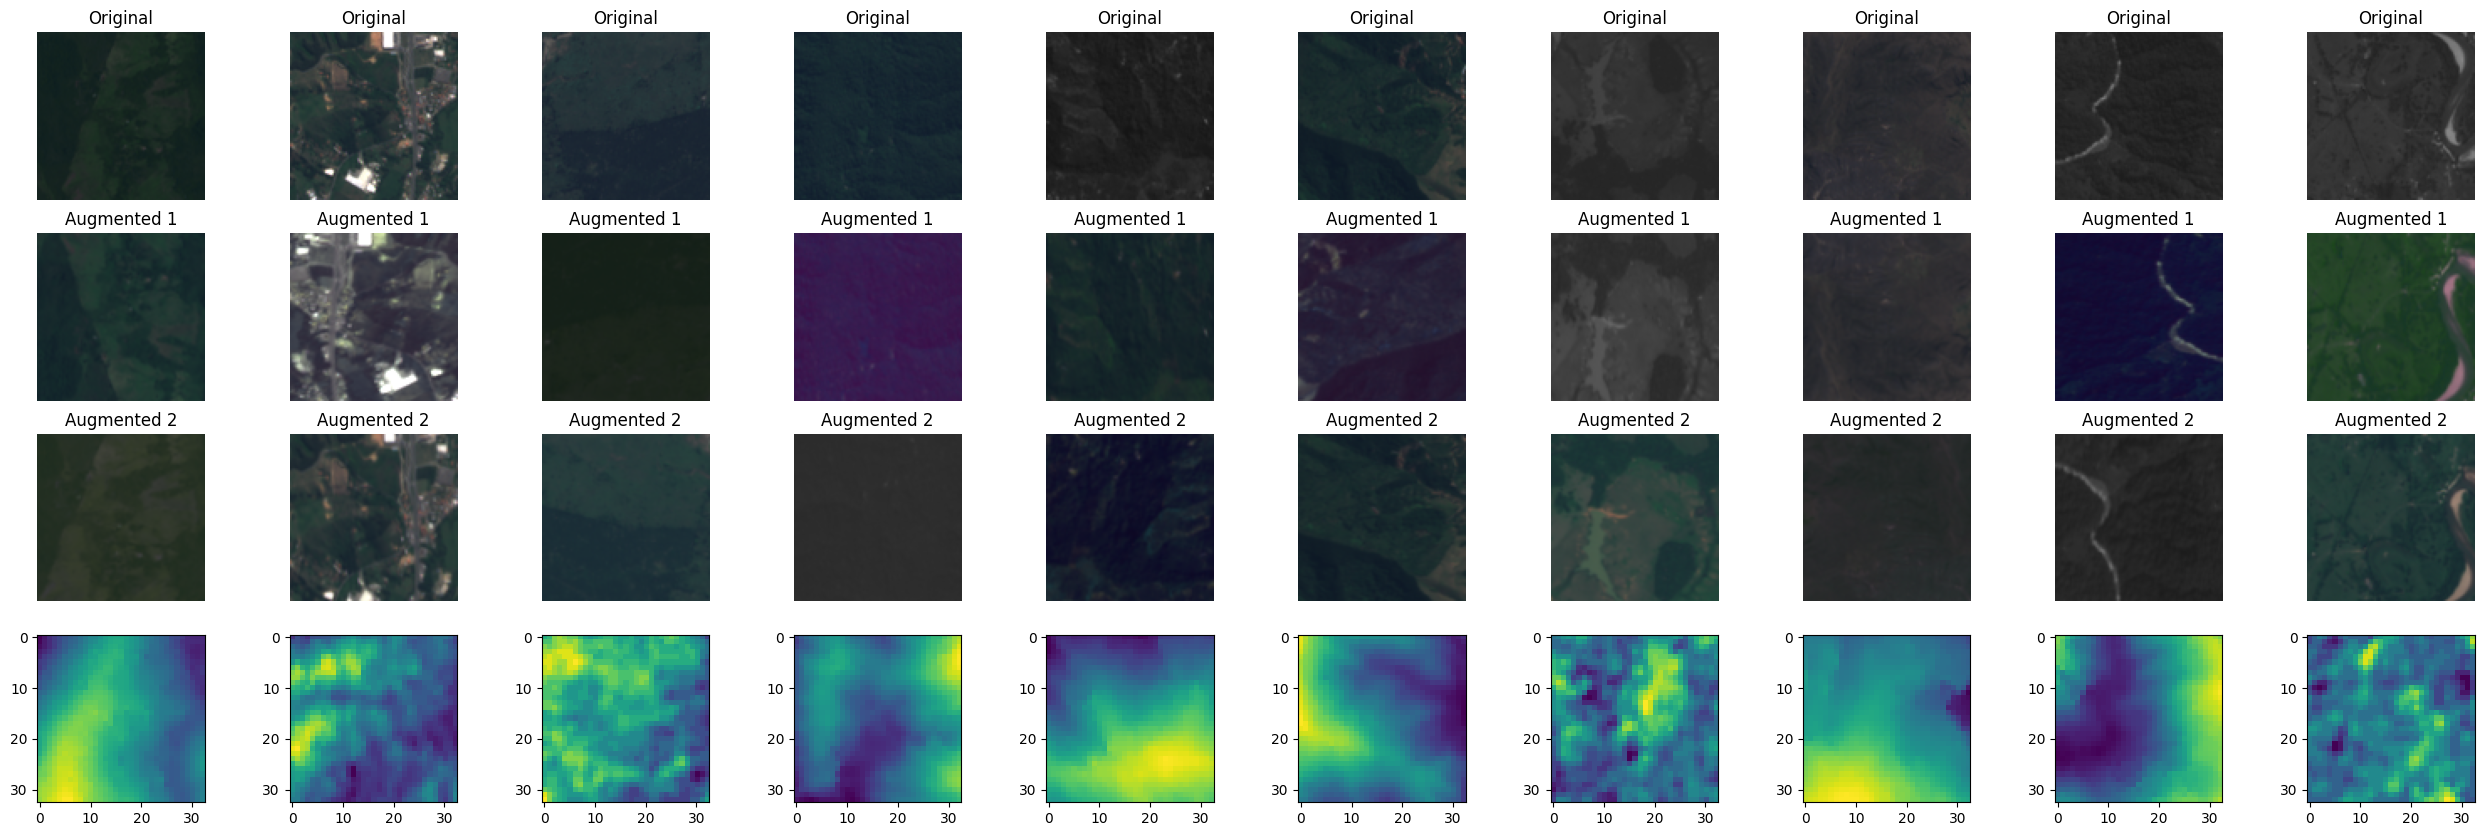

In [14]:
# Visualize augmented images and elevation maps
augment = {
    "horizontal_flip_prob": 0.5,
    "vertical_flip_prob": 0.5,
    "resize_scale": (0.7, 1.0),
    "resize_prob": 1.0,
    "brightness": 0.4,
    "contrast": 0.4,
    "saturation": 0.4,
    "hue": 0.2,
    "color_jitter_prob": 0.5,
    "gray_scale_prob": 0.2,
}

augment_original = {
    "horizontal_flip_prob": 0.5,
    "vertical_flip_prob": 0.5,
    "resize_scale": (0.8, 1.0),
    "resize_prob": 0.0,
    "brightness": 0.2,
    "contrast": 0.2,
    "saturation": 0.2,
    "hue": 0.1,
    "color_jitter_prob": 0.2,
    "gray_scale_prob": 0.2,
}

ds = CustomDataset(
    path_to_images,
    path_to_elevations,
    metadata.head(10),
    return_original=True,
    augment=augment,
    augment_original=augment_original,
    normalizing_factor=4000,
)
visualize_augmented_images(ds, brightness=0.0, n=10)

## Training

In [ ]:
# Split data in training and test
metadata_train, metadata_test = train_test_split(metadata, test_size=0.05)
print(metadata_train.shape)
print(metadata_test.shape)

In [ ]:
path_to_save_model = "/media/omar/storage/gdrive/Maestria/Theses/SSL/ElevationSSL/models/resnet18/Elevation"

In [ ]:
augment_original = {
    "horizontal_flip_prob": 0.5,
    "vertical_flip_prob": 0.5,
    "resize_scale": (0.7, 1.0),
    "resize_prob": 0.0,
    "brightness": 0.2,
    "contrast": 0.2,
    "saturation": 0.2,
    "hue": 0.2,
    "color_jitter_prob": 0.3,
    "gray_scale_prob": 0.2,
}

metadata_kwargs = {
    "path_to_images": path_to_images,
    "path_to_elevations": path_to_elevations,
    "path_to_save_model": None,  # path_to_save_model,  # Path to save the model that is being trained (do not include the extension .pt or .pth)
    "path_to_load_model": None,  # Path to load a model from a checkpoint (useful to handle notebook disconection)
    "metadata_train": metadata_train,
    "metadata_test": metadata_test,
    "metadata_valid": None,
    "num_workers": 6,
    "device": "cuda",
    "augment_original": augment_original,
}


augment = {
    "horizontal_flip_prob": 0.5,
    "vertical_flip_prob": 0.5,
    "resize_scale": (0.7, 1.0),
    "resize_prob": 1.0,
    "brightness": 0.4,
    "contrast": 0.4,
    "saturation": 0.4,
    "hue": 0.2,
    "color_jitter_prob": 0.5,
    "gray_scale_prob": 0.2,
}


hypm_kwargs = {
    "version": "ElevationSSL",
    "model_name": "ElevationSSL",
    "alpha": 1,  # If zero is the SimCLR contrastive model
    "amount_ss_data": metadata_train,
    "input_size": 100,
    "output_size": 33,
    "decoder_channels": [256, 128, 64],
    "backbone": "resnet18",
    "fine_tune": None,
    "tf_epoch": None,
    "pretrained": False,
    "in_channels": 3,
    "normalizing_factor": 6000,
    "temperature": 0.5,  # Temperature hyperparameter used in the NTXenLoss function
    "weight_decay": 0.00005,
    "learning_rate": 1e-3,
    "train_batch_size": 128,
    "test_batch_size": 20,
    "epochs": 5,
    "augment_train": augment,
    "augment_test": augment,
    "eval_epoch": 5,
}

wandb_kwargs = {
    "project": "Elevations-SSL",
    "entity": "omar-c",
    "id": None,
    "name": "Elevation-augment",
    "resume": False,
}

In [ ]:
trainer = Trainer(CustomDataset, visualize_augmented_images, wandb_kwargs, hypm_kwargs, metadata_kwargs)
trainer.configure_trainer()

In [ ]:
trainer.fit()